In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

In [3]:
smica_map_I = hp.read_map("/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_hm2.fits")  #impainted map

In [4]:

mask = hp.read_map('/home/augusto/Descargas/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits').astype(np.bool_)
smica_map_I_masked = hp.ma(smica_map_I)
#smica_map_I_masked.mask = np.logical_not(mask) 

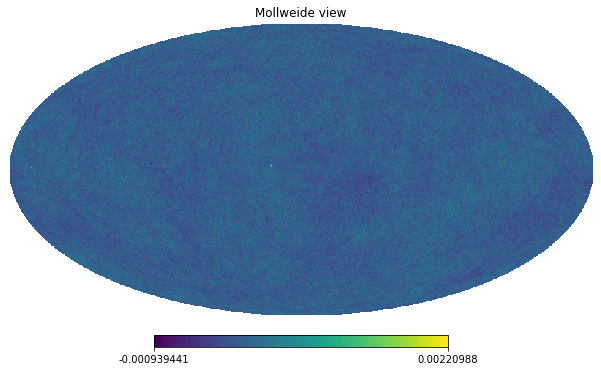

In [5]:
hp.mollview(smica_map_I_masked.filled()) # no mask

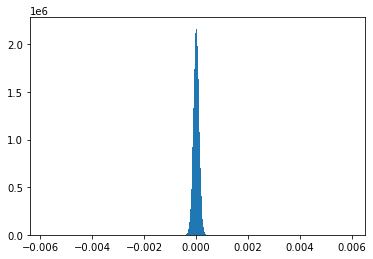

In [6]:
plt.hist(smica_map_I_masked.compressed(), bins=1000);

In [7]:
LMAX = 2000
cl = hp.anafast(smica_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))
sky_fraction = 1 #len(smica_map_I)/len(smica_map_I_masked)=1
print(f"The map covers {sky_fraction:.1%} of the sky")


The map covers 100.0% of the sky


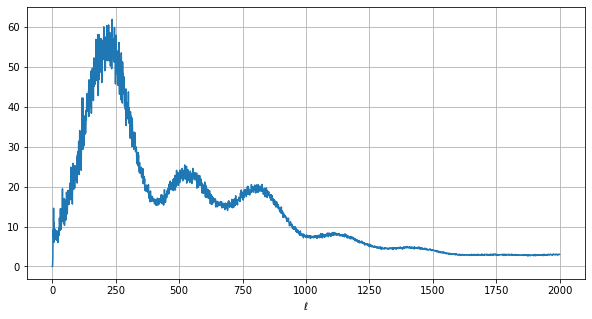

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell*sky_fraction*(ell + 1)/2/np.pi * cl*1e10)
plt.xlabel("$\ell$")
plt.ylabel
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

In [9]:
k2muK = 1e6
LMAX = 2500
cl = hp.anafast(smica_map_I_masked.filled(), lmax=LMAX)*(k2muK**2)/2./np.pi
ell = np.arange(len(cl))

In [11]:
cl*ell*(ell+1)*np.sqrt(2./(ell+1))


array([0.00000000e+00, 6.09384073e-12, 1.66045454e+02, ...,
       1.12426888e+01, 1.10733278e+01, 1.12126858e+01])

[0.00000000e+00 6.09384073e-12 1.66045454e+02 ... 1.12426888e+01
 1.10733278e+01 1.12126858e+01]


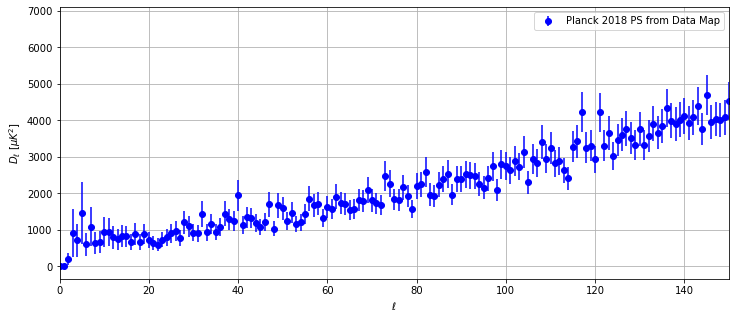

In [12]:
k2muK = 1e6
plt.figure(figsize=(12, 5))
y = ell *cl*(ell + 1)
x = ell
yerr=np.sqrt(2./(ell+1))*cl*ell*(ell+1)
print(yerr)
plt.errorbar(ell,y , yerr=yerr, fmt='bo',label='Planck 2018 PS from Data Map')
plt.xlabel(r'$\ell$')
plt.xlim(0, 150)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_\ell~[\mu K^2]$")
plt.legend()
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import camb
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [14]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

In [15]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()

In [16]:
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=70.0, ombh2=0.022, omch2=0.119, mnu=0.06, omk=0, tau=0.057)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(150, lens_potential_accuracy=0)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 300
 max_l_tensor = 600
 max_eta_k = 750.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.119
 omk = 0.0
 omnuh2 = 0.0006451383989381787
 H0 = 70.0
 TCMB = 2.7255
 YHe = 0.24524332588411976
 num_nu_massless = 2.030666666666667
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0153333333333332]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nrun = 0

In [17]:
#calculate results for these parameters
results = camb.get_results(pars)

In [18]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


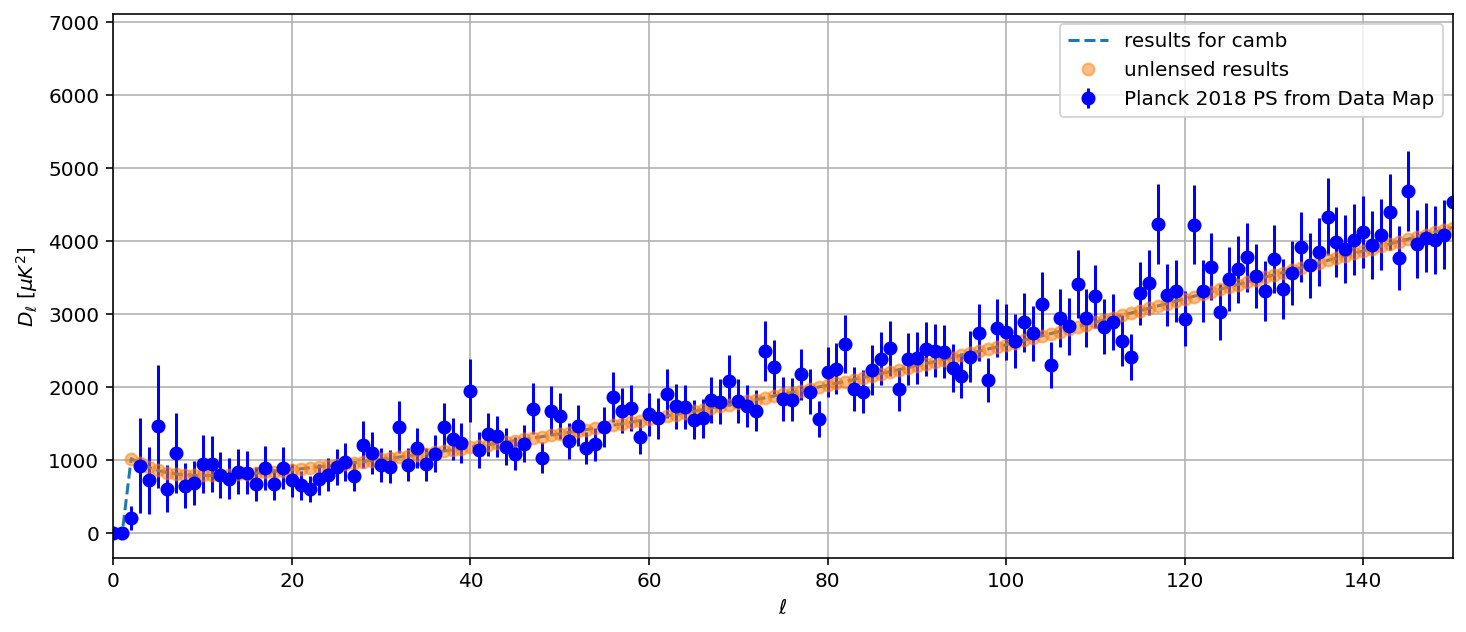

In [19]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls=np.arange(totCL.shape[0])
plt.figure(figsize=(12, 5))
plt.errorbar(ell,y , yerr=yerr, fmt='bo',label='Planck 2018 PS from Data Map')
plt.plot(ls, totCL[:,0], '--', alpha = 1, label='results for camb')
plt.plot(ls, unlensedCL[:,0], 'o', alpha = 0.5, label ='unlensed results')
plt.xlim(0, 150)
plt.xlabel(r'$\ell$')
plt.ylabel(r"$D_\ell~[\mu K^2]$")
plt.legend()
plt.grid()


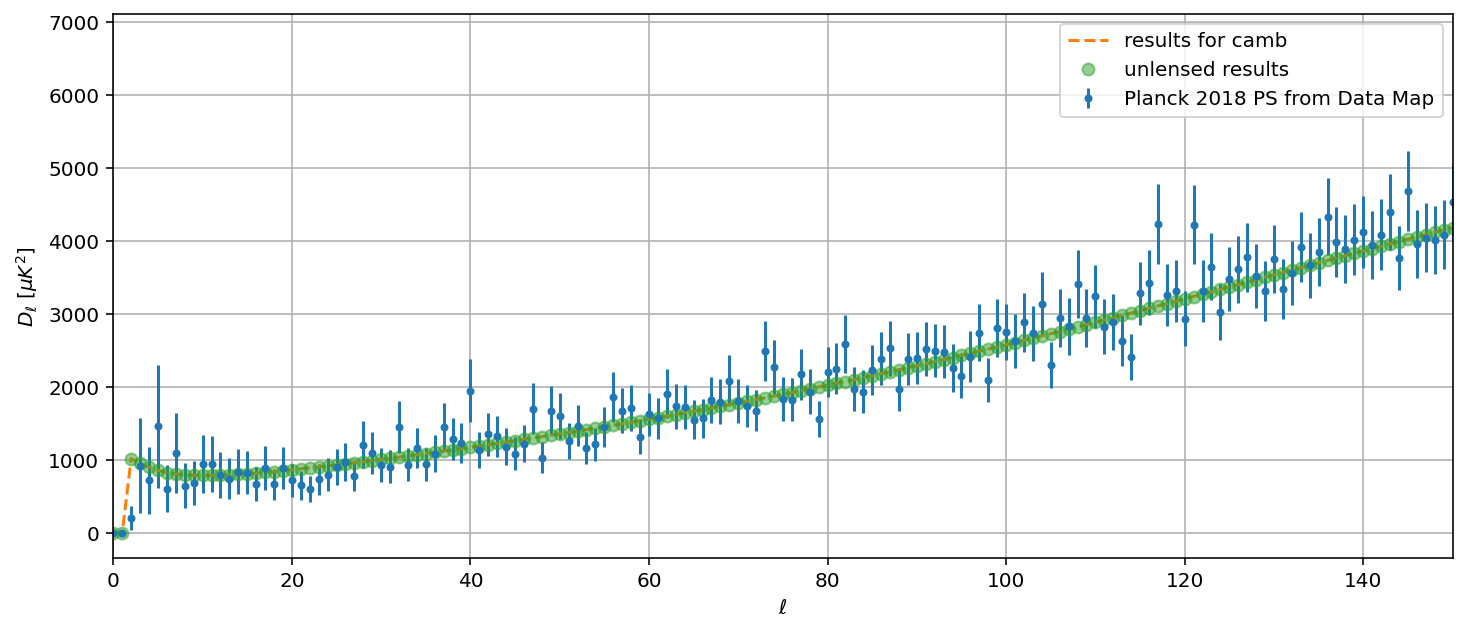

In [20]:
plt.figure(figsize=(12, 5))
y = ell *cl*(ell + 1)
x = ell
yerr=np.sqrt(2./(ell+1))*cl*ell*(ell+1)
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls=np.arange(totCL.shape[0])
plt.errorbar(ell,y , yerr=yerr, fmt='.',label='Planck 2018 PS from Data Map')
plt.plot(ls, totCL[:,0], '--', alpha = 1, label='results for camb')
plt.plot(ls, unlensedCL[:,0], 'o', alpha = 0.5, label ='unlensed results')
plt.xlim(0, 150)
plt.xlabel(r'$\ell$')
plt.ylabel(r"$D_\ell~[\mu K^2]$")
plt.legend()
plt.grid()
plt.savefig('planckmapsvscamblowl.pdf')

In [21]:
k2muK = 1e6
LMAX = 80
cl = hp.anafast(smica_map_I_masked.filled(), lmax=LMAX)*(k2muK)**2/2/np.pi
delta_cl=np.sqrt(2/(ell+1))

In [23]:

plt.figure(figsize=(12, 5))
y = ell*(ell + 1)*cl*sky_fraction 
x = ell
yerr=delta_cl
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls=np.arange(totCL.shape[0])
plt.plot(ls, totCL[:,0], '--', alpha = 0.1, label='results for camb')
plt.plot(ls, unlensedCL[:,0], '.', alpha = 0.5, label ='unlensed results')

plt.errorbar(ell,y , yerr=delta_cl, fmt='bo', alpha = 0.5,label='Planck 2018 PS from Data Map')
plt.xlabel(r'$\ell$')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_\ell~[\mu K^2]$")
plt.grid()
plt.legend()
hp.write_cl("cl.fits", cl, overwrite=True)
plt.savefig('lowlcmb.png')

ValueError: operands could not be broadcast together with shapes (2501,) (81,) 

<Figure size 864x360 with 0 Axes>

In [22]:
#l= 2000 PS
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=70.0, ombh2=0.022, omch2=0.119, mnu=0.06, omk=0, tau=0.057)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2000, lens_potential_accuracy=0)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2150
 max_l_tensor = 600
 max_eta_k = 5375.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.119
 omk = 0.0
 omnuh2 = 0.0006451383989381787
 H0 = 70.0
 TCMB = 2.7255
 YHe = 0.24524332588411976
 num_nu_massless = 2.030666666666667
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0153333333333332]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nrun =

In [26]:
#calculate results for these parameters
results = camb.get_results(pars)

In [27]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


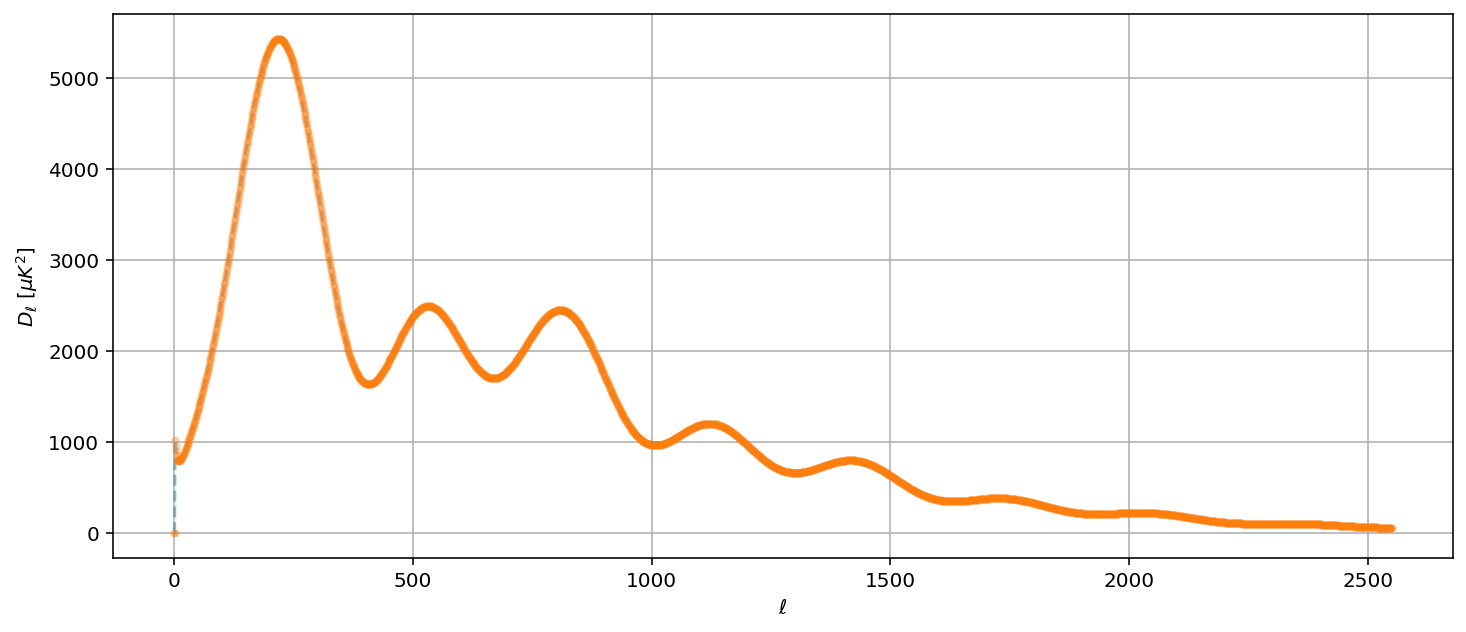

In [28]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls=np.arange(totCL.shape[0])
plt.figure(figsize=(12, 5))
plt.plot(ls, totCL[:,0], '--', alpha = 0.5, label="results for camb$")
plt.plot(ls, unlensedCL[:,0], '.', alpha= 0.3, label ='unlensed')
plt.xlabel(r'$\ell$')
plt.ylabel(r"$D_\ell~[\mu K^2]$")
plt.grid()

In [31]:
import healpy as hp
filename = "/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_hm2.fits" #open the map file
cmb_map = hp.read_map(filename)                                            #read the map


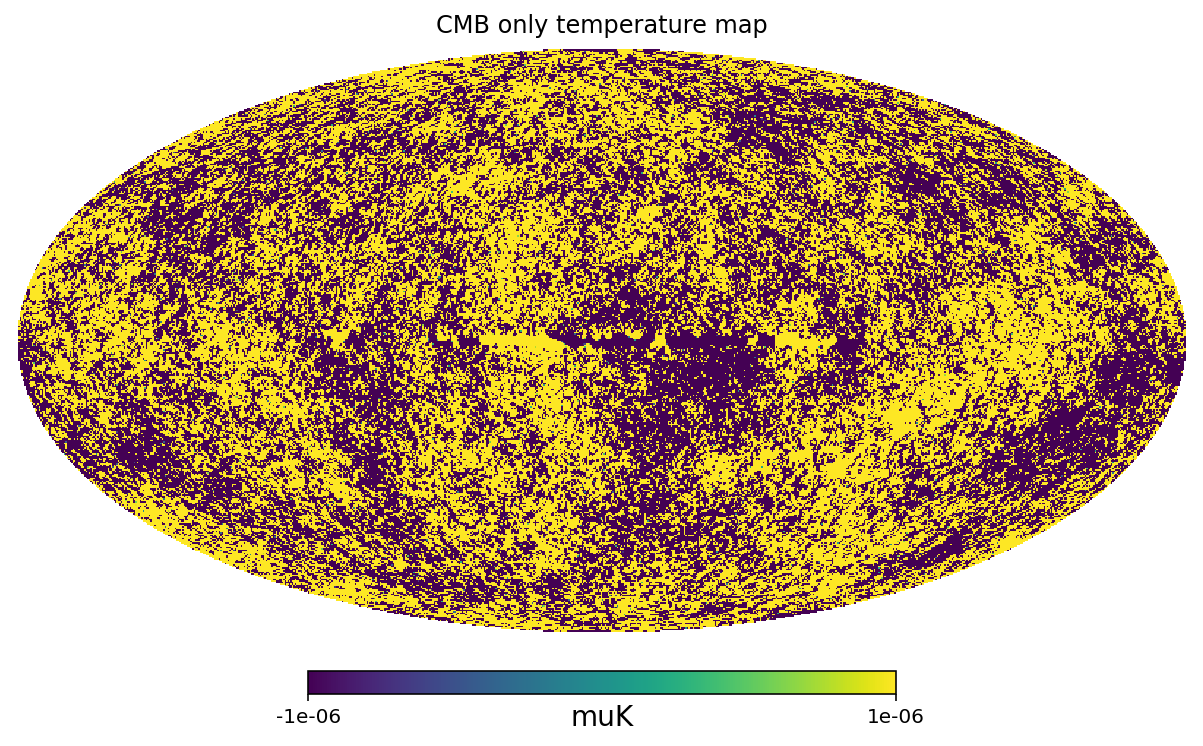

In [35]:
hp.mollview(cmb_map, min=-1e-6, max=1e-6, title="CMB only temperature map", unit="muK") #show de map


In [36]:
import numpy as np
path = 'COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits'           #define the mask
mask = hp.read_map(path)                                        # read the mask
map_masked = hp.ma(cmb_map)
map_masked.mask = np.logical_not(mask)

FileNotFoundError: [Errno 2] No such file or directory: 'COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits'

In [33]:
hp.mollview(map_masked, min=-1e-6, max=1e-6, title="CMB temperature map and mask", unit="muK")

NameError: name 'map_masked' is not defined

In [35]:
lmax=2000
test_cls_meas_frommap = hp.anafast(map_masked, lmax=lmax, use_pixel_weights=True)
ll = np.arange(lmax+1)
sky_fraction = len(map_masked.compressed()) / len(map_masked)


In [36]:
k2muK = 1e6
import matplotlib.pyplot as plt

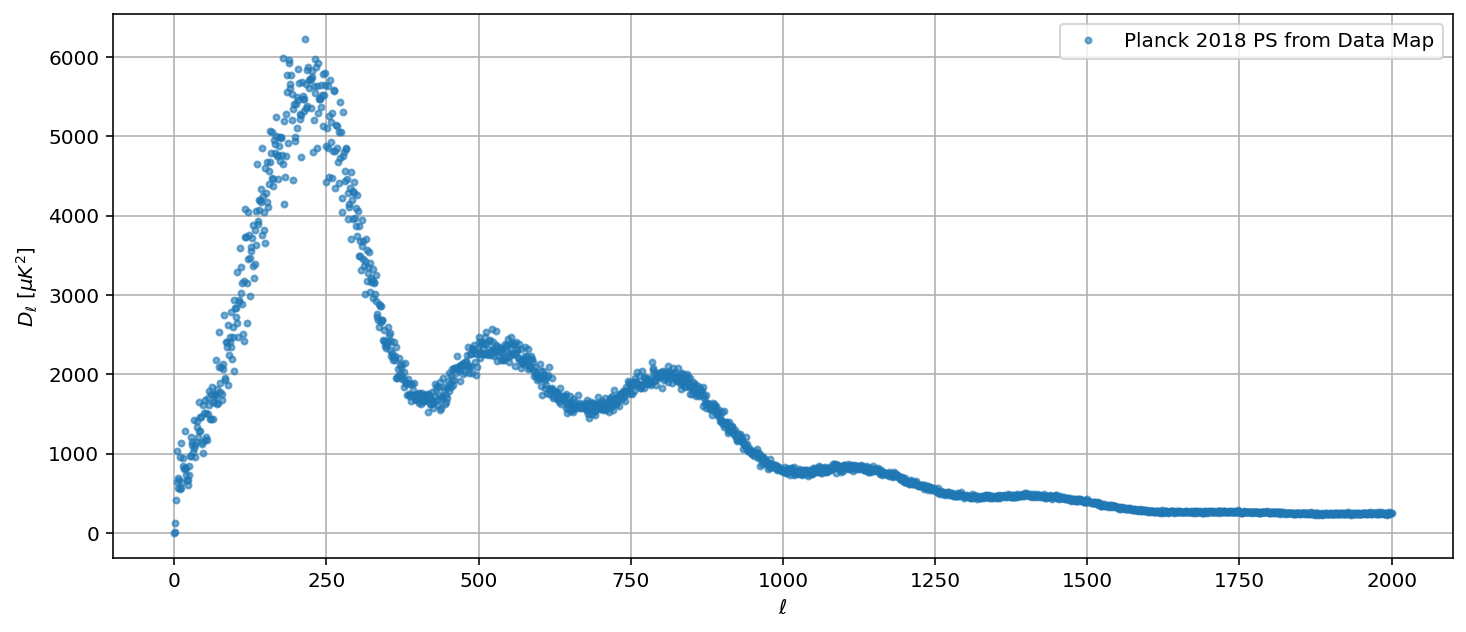

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction, '.', alpha=0.6, label='Planck 2018 PS from Data Map')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend(loc='best')

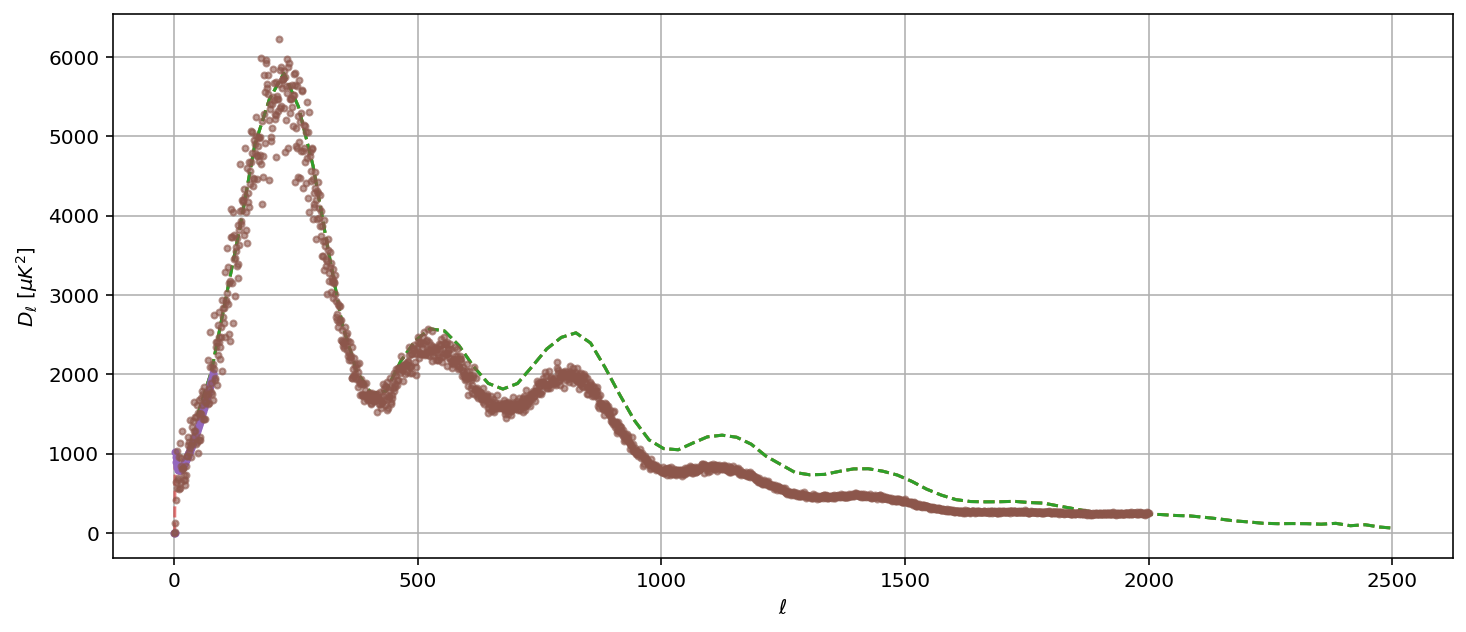

In [47]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls=np.arange(totCL.shape[0])
plt.figure(figsize=(12, 5))
plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='Planck 2018 PS release')

plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='Planck 2018 PS release')
plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='Planck 2018 PS release')
plt.plot(ls, totCL[:,0], '--', alpha = 0.6, label="Planck results by camb")
plt.plot(ls, unlensedCL[:,0], '.', alpha = 1, label ="unlensed results")
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction, '.', alpha=0.6, label='Planck 2018 PS from Data Map')
plt.xlabel(r'$\ell$')
plt.ylabel(r"$D_\ell~[\mu K^2]$")
plt.grid()

In [42]:
#l= 2000 PS
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=70.0, ombh2=0.022, omch2=0.119, mnu=0.06, omk=0, tau=0.057)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2000, lens_potential_accuracy=0)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2150
 max_l_tensor = 600
 max_eta_k = 5375.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.119
 omk = 0.0
 omnuh2 = 0.0006451383989381787
 H0 = 70.0
 TCMB = 2.7255
 YHe = 0.24524332588411976
 num_nu_massless = 2.030666666666667
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0153333333333332]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nrun =

In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [44]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

In [45]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#calculate results for these parameters
results = camb.get_results(pars)

CAMBValueError: Parameter values not set

In [22]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

NameError: name 'results' is not defined

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

In [24]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=70, ombh2=0.022, omch2=0.119, mnu=0.06, omk=0, tau=0.057)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2000, lens_potential_accuracy=0);

In [25]:
#calculate results for these parameters
results = camb.get_results(pars)

In [26]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


NameError: name 'll' is not defined

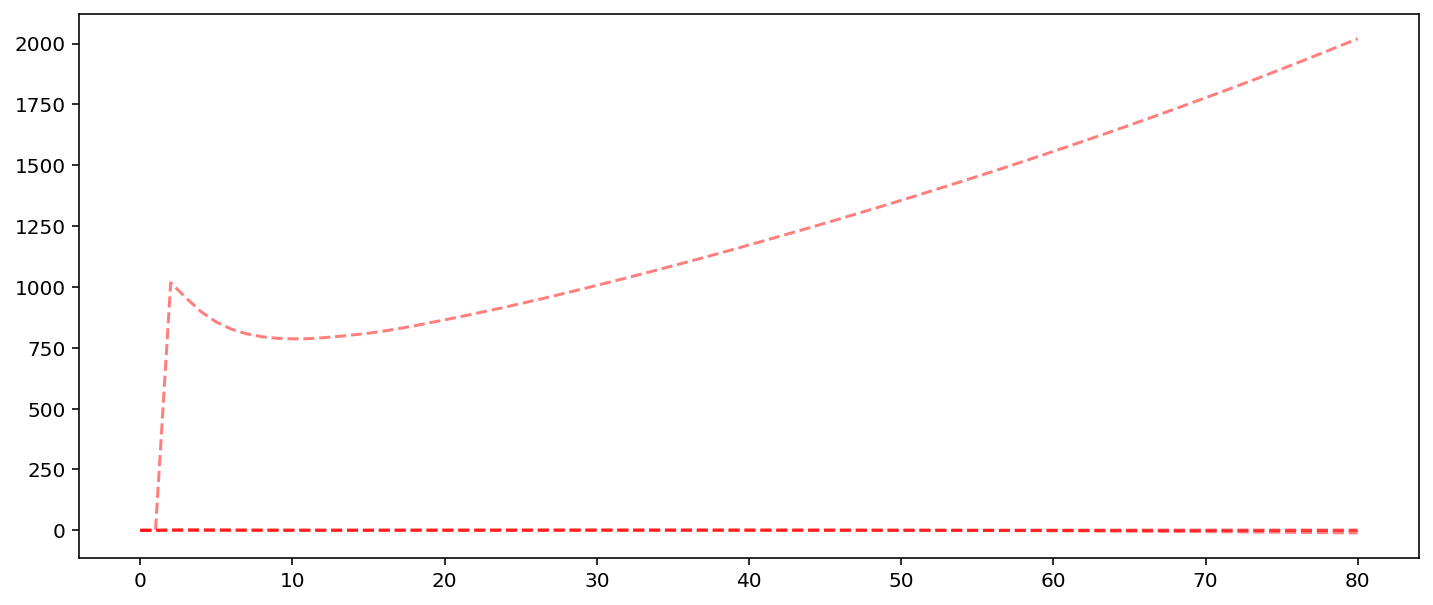

In [26]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls=np.arange(totCL.shape[0])
plt.figure(figsize=(12, 5))
plt.plot(ls, totCL,  '--', color = 'r', alpha = 0.5, label="Planck results by camb")
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction, '.', alpha=0.6, label='Planck 2018 PS from Data Map')
plt.xlabel(r'$\ell$')
plt.ylabel(r"$D_\ell~[\mu K^2]$")
plt.grid()
plt.savefig('l until 2000.png')

In [25]:
import astropy.units as u
w_ell = hp.gauss_beam((5*u.arcmin).to_value(u.radian), lmax=lmax)
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')


NameError: name 'lmax' is not defined

In [46]:
import astropy.units as u
w_ell = hp.gauss_beam((5*u.arcmin).to_value(u.radian), lmax=lmax)
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')

In [24]:

totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls=np.arange(totCL.shape[0])
plt.figure(figsize=(12, 5))
plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='Planck 2018 PS release')
plt.plot(ls, totCL[:,0],  '--', color = 'r', alpha = 0.5, label="Planck results by camb")
plt.plot(ls, unlensedCL[:,0], '.', color = 'g', alpha = 0.3, label ="unlensed")
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction / w_ell**2,
         alpha=0.6, label='Planck 2018 PS from Data Map (beam corrected)')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend(loc='best');
plt.savefig('comparePS.png')

NameError: name 'cmb_binned_spectrum' is not defined

<Figure size 864x360 with 0 Axes>

In [69]:
delta_y=(totCL[:,0]-ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction / w_ell**2)

ValueError: operands could not be broadcast together with shapes (2051,) (2001,) 